In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


import json
%matplotlib inline

First, let's pull a dataframe containing county-level census data. Specifically, we'll be cleaning it up so that we're looking at the percentage of adults with a bachelor's degree (recorded between 2013 and 2017) for each county.

In [2]:
education = pd.read_csv('data/Education.csv', encoding='ISO-8859-1', header=0)
education = education[['Area name','State', "Percent of adults with a bachelor's degree or higher, 2013-17"]]
education.columns = ['County Name','State', 'Percent_Bachelors_Degree']
education = education.dropna().reset_index(drop=True)
education.head()

,County Name,State,Percent_Bachelors_Degree
0,United States,US,30.9
1,Alabama,AL,24.5
2,Autauga County,AL,25.0
3,Baldwin County,AL,30.7
4,Barbour County,AL,12.0


1) Plot a histogram of the percentage of adults with a bachelor's degree or higher. Be sure to properly label the title and axes of the graph.

(array([3.140e+02, 1.348e+03, 8.930e+02, 4.050e+02, 1.740e+02, 8.300e+01,
        3.700e+01, 1.600e+01, 1.000e+00, 2.000e+00]),
 array([ 4.7 , 12.04, 19.38, 26.72, 34.06, 41.4 , 48.74, 56.08, 63.42,
        70.76, 78.1 ]),
 <a list of 10 Patch objects>)

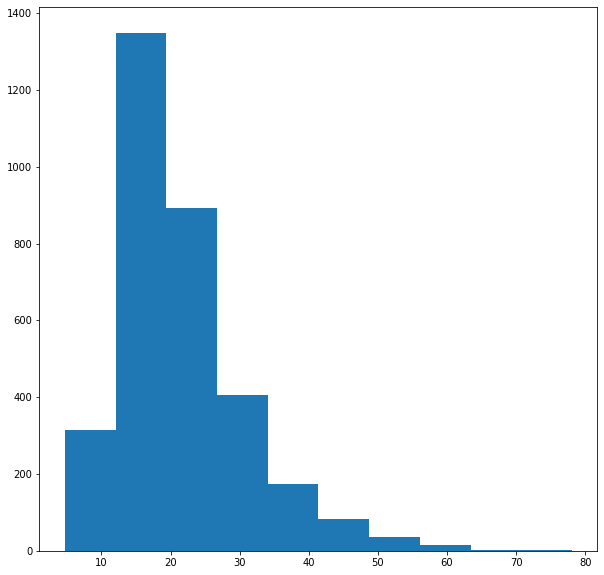

In [3]:
fig = plt.figure(figsize=(10,10))
plt.hist(education["Percent_Bachelors_Degree"])

2) Is this distribution positively skewed, negatively skewed, or unskewed? If it's skewed, use a transformation to unskew it. Try a few until you find a result that looks closest to a normal distribution and plot a histogram of that transformation, again with proper labelling of the title and axes.

(array([  3.,   1.,   5.,  20.,  56.,  96., 224., 330., 426., 467., 461.,
        351., 272., 232., 137.,  94.,  59.,  29.,   8.,   2.]),
 array([1.54756251, 1.68808389, 1.82860526, 1.96912664, 2.10964802,
        2.2501694 , 2.39069077, 2.53121215, 2.67173353, 2.81225491,
        2.95277628, 3.09329766, 3.23381904, 3.37434042, 3.51486179,
        3.65538317, 3.79590455, 3.93642592, 4.0769473 , 4.21746868,
        4.35799006]),
 <a list of 20 Patch objects>)

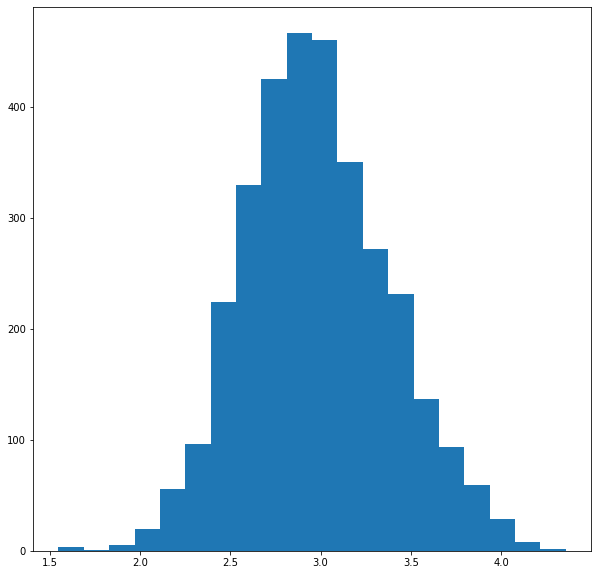

In [4]:
fig = plt.figure(figsize=(10,10))
plt.hist(np.log(education["Percent_Bachelors_Degree"]),bins = 20)

Now let's look at this data state-by-state. We'll take the mean value of the percentage of adults with a bachelor degree by state (notice this groupby function, as it may be helpful for aggregating data for your projects).

In [5]:
state_mean = education.groupby('State')['Percent_Bachelors_Degree'].mean().reset_index()
state_mean.head()

,State,Percent_Bachelors_Degree
0,AK,22.733333
1,AL,17.517647
2,AR,15.853947
3,AZ,20.381250
4,CA,26.525424


3) Which state has the highest average percentage of adults with a bachelor's degree? Which state has the lowest? (Hint: Look at the 'Descriptive Statistics Class Notebook' all the way back from Week 2 for an idea of how to query this in the dataframe)

If you are not familiar with which abbreviation corresponds to which state, use this for reference: https://www.50states.com/abbreviations.htm

In [6]:

print(state_mean[state_mean['Percent_Bachelors_Degree'] == np.max(state_mean['Percent_Bachelors_Degree'])])
print(state_mean[state_mean['Percent_Bachelors_Degree'] ==np.min(state_mean['Percent_Bachelors_Degree'])])

  State  Percent_Bachelors_Degree
7    DC                      56.6
  State  Percent_Bachelors_Degree
2    AR                 15.853947


4) Plot a boxplot for the percentage of adults with a bachelor degree by state. Are there any outliers? If so, how many? What is the numerical cutoff for an outlier on either side (hint: an outlier is anything greater than 1.5 * the third quantile or anything less than 1.5 * the first quantile)

(Hint: Look at the 'Descriptive Statistics Class Notebook' all the way back from Week 2 for an idea of how to calculate and find this)

There are 3 outlier
The Percent_Bachelors_Degree greater than 40.65 and  The Percent_Bachelors_Degree less than 29.769101123595505 are the cutoff for the outlier


{'whiskers': [<matplotlib.lines.Line2D at 0x1c312a1e358>,
 'caps': [<matplotlib.lines.Line2D at 0x1c3129f1438>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c312a1e780>],
 'medians': [<matplotlib.lines.Line2D at 0x1c3129f1ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c3129f1e10>],
 'means': []}

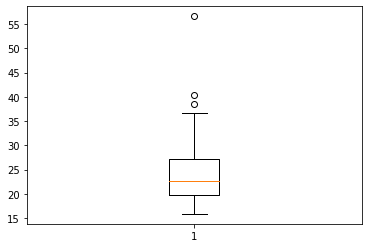

In [7]:
print("There are 3 outlier")
print("The Percent_Bachelors_Degree greater than" ,1.5 * state_mean['Percent_Bachelors_Degree'].quantile(0.75) , "and", 
      " The Percent_Bachelors_Degree less than",  1.5 * state_mean['Percent_Bachelors_Degree'].quantile(0.25), "are the cutoff for the outlier"  )
plt.boxplot(x = state_mean['Percent_Bachelors_Degree'])

Now, let's read in a dataset that tells us whether a particular state voted for Al Gore or George Bush in 2000.

In [8]:
votes_2016 = pd.read_excel('data/federalelections2016.xlsx', sheet_name=2, skiprows=3, skipfooter=7)
votes_2016.columns = ['State', 'Electoral_Trump', 'Electoral_Clinton', 'Popular_Trump', 'Popular_Clinton', 'Popular_Others', 'Total_Popular']
votes_2016.head()

,State,Electoral_Trump,Electoral_Clinton,Popular_Trump,Popular_Clinton,Popular_Others,Total_Popular
0,AL,9,NaN,1318255,729547,75570,2123372
1,AK,3,NaN,163387,116454,38767,318608
2,AZ,11,NaN,1252401,1161167,159597,2573165
3,AR,6,NaN,684872,380494,65310,1130676
4,CA,NaN,55,4483814,8753792,943998,14181604


And let's make a list of which states voted blue and voted red based on their electoral vote (note that Maine registered 3 votes for Clinton and 1 for Trump - we will count it as a blue state for this exercise)

In [9]:
blue_states = list(votes_2016[votes_2016['Electoral_Clinton'].notnull()]['State'])
red_states = list(votes_2016[votes_2016['Electoral_Trump'].notnull()]['State'])
#Remove Value from List
red_states.remove('ME')

Finally, we can get dataframes of the percentage of adults with a bachelor's degree for both blue states and red states.

In [10]:
blue_state_means = state_mean[state_mean['State'].isin(blue_states)]
red_state_means = state_mean[state_mean['State'].isin(red_states)]


5) Plot a boxplot showing blue states and red states (hint: you can plot two separate items in a boxplot by plotting an array, i.e. :  
plt.boxplot([df_a['a'], df_b['a'], labels=['a','b'])

Do blue states or red states have a higher mean % of bachelor degrees? What are the means of each? What is the mean difference between the two?

Do either groups of states have outliers? Which states are outliers?

mean of blue states: 30.27389596603505
mean of red states: 20.320469809727662
The mean difference is: 9.953426156307387
Blue states have outlier and the outlier is
  State  Percent_Bachelors_Degree
7    DC                      56.6


{'whiskers': [<matplotlib.lines.Line2D at 0x1c312ae2860>,
 'caps': [<matplotlib.lines.Line2D at 0x1c313289dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c312ae2cf8>,
 'medians': [<matplotlib.lines.Line2D at 0x1c3132891d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c313289080>,
 'means': []}

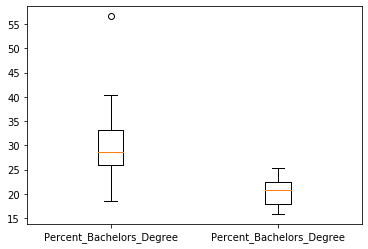

In [11]:
X = np.mean(blue_state_means['Percent_Bachelors_Degree'])
Y = np.mean(red_state_means['Percent_Bachelors_Degree'])
print("mean of blue states:", X)
print("mean of red states:", Y)
print("The mean difference is:", X - Y)
print("Blue states have outlier and the outlier is")
print(blue_state_means[blue_state_means['Percent_Bachelors_Degree'] == np.max(blue_state_means['Percent_Bachelors_Degree'])] )
plt.boxplot([blue_state_means['Percent_Bachelors_Degree'], red_state_means['Percent_Bachelors_Degree']], 
           labels= ['Percent_Bachelors_Degree','Percent_Bachelors_Degree'])



6) Using the pooled variance function below, find the pooled variance and pooled standard deviation for the two groups of states.

In [12]:
def custom_pooled_variance(a, b):
    return ((((len(a) - 1) * np.var(a, ddof=1)) + ((len(b) - 1) * np.var(b, ddof=1))) / (len(a) + len(b) - 2)) * ((1/len(a)) + 1/len(b))

In [13]:
pool_var = custom_pooled_variance(blue_state_means,red_state_means)
print('Pooled variance:', np.round(pool_var),2)
print('pooled standard deviation', np.round(np.sqrt(pool_var),2))

Pooled variance: Percent_Bachelors_Degree    3.0
dtype: float64 2
pooled standard deviation Percent_Bachelors_Degree    1.65
dtype: float64


7) Say that we want to see if the average percentage of adults with bachelor's degrees is higher in blue states than in red states. In this case, what is our null hypothesis and our alternate hypothesis?

In [14]:
print("Null Hypothesis is the average percentage of adults with bachelor's degrees of red states is higher than in blue states ")
print("Alternate Hypothesis is the average percentage of adults with bachelor's degrees of blue states is higher than in red states")



Null Hypothesis is the average percentage of adults with bachelor's degrees of red states is higher than in blue states 
Alternate Hypothesis is the average percentage of adults with bachelor's degrees of blue states is higher than in red states


8) Find the proper parameters for the T-distribution to test our null hypothesis. What is the mean, standard deviation, and degrees of freedom of our null hypothesis?

In [21]:
len(blue_state_means['Percent_Bachelors_Degree']) -1 + len(red_state_means['Percent_Bachelors_Degree']) -1


49

Mean: 0  
Standard Deviation: 1.65  
Degrees of Freedom: 49  

9) At a signifiance level of 0.05, what are the rejection region (s?) of our distribution? Make a plot highlighting these rejection region (s?) in red.

Rejection Region: Greater than 2.77


Text(0.5, 0.92, 'T-Distribution of Difference Between Samples')

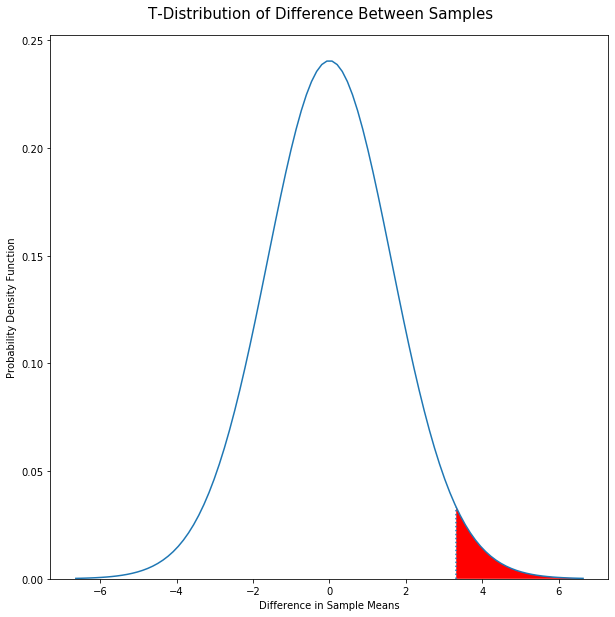

In [16]:
dist = stats.t(loc = 0, scale = 1.65 , df = 49)

print('Rejection Region: Greater than', np.round(dist.ppf(0.95), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))


plt.plot([dist.ppf(0.975), dist.ppf(0.975)],[0, dist.pdf(dist.ppf(0.975))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.975), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Difference in Sample Means')
plt.ylabel('Probability Density Function')
fig.suptitle('T-Distribution of Difference Between Samples', fontsize=15, y=0.92)

10) At a significance level of 0.05, can we reject the null hypothesis? What is the p-value of our observed difference?

In [17]:
print(np.mean(blue_state_means['Percent_Bachelors_Degree']) - np.mean(red_state_means['Percent_Bachelors_Degree']))
print((1 - dist.cdf(np.mean(blue_state_means['Percent_Bachelors_Degree']) - np.mean(red_state_means['Percent_Bachelors_Degree'])))) 


9.953426156307387
1.0432141472893619e-07


Yes, we can reject the null hypothesis, as the mean difference of 9.95 is much higher than the rejection cutoff of 2.76 and has a p-value of close to 0.

BONUS: 11) Now run a boostrapping example using 10,000 simulations. Use np.random.seed(42) to ensure consistency if you run again. Concatenate the blue states and red states, shuffle them, and then break out new blue states and red states, similar to what we did last week in class. Record the difference between the blue states and red states.

Plot a histogram of the 10,000 differences recorded. What is the average difference?

Text(0.5, 0.92, 'Bootstrap Distribution of Difference Between Samples')

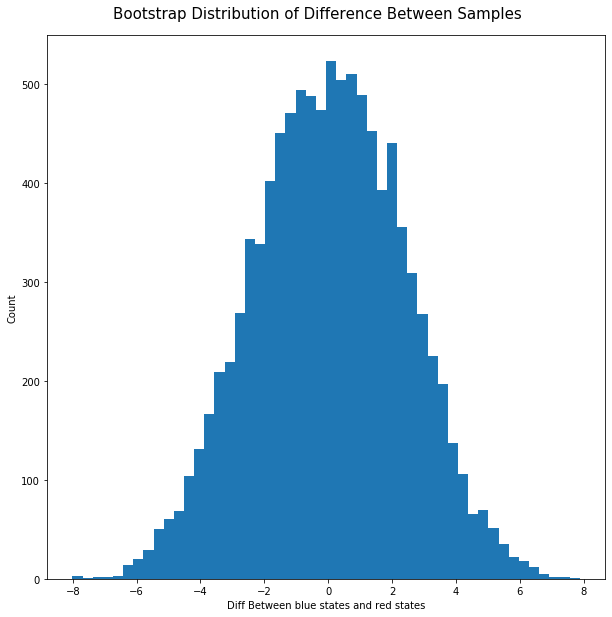

In [18]:
np.random.seed(42)
diff = []
for i in range(10000):
    total = list(blue_state_means['Percent_Bachelors_Degree']) + list(red_state_means['Percent_Bachelors_Degree'])
    np.random.shuffle(total)
    new_a = total[:len(blue_state_means['Percent_Bachelors_Degree'])]
    new_b = total[len(red_state_means['Percent_Bachelors_Degree']):]
    diff.append(np.mean(new_a) - np.mean(new_b))
fig = plt.figure(figsize=(10,10))
plt.hist(diff, bins=50)
plt.xlabel('Diff Between blue states and red states')
plt.ylabel('Count')
fig.suptitle('Bootstrap Distribution of Difference Between Samples', fontsize=15, y=0.92)

BONUS: 12) At a signifiance level of 0.05, what are the rejection region (s?) of our distribution?

In [19]:
np.percentile(diff, 95)

3.7960071450521875

BONUS: 13) At a significance level of 0.05, can we reject the null hypothesis? What is the p-value of our observed difference?

In [20]:
print("Mean difference:",np.mean(blue_state_means['Percent_Bachelors_Degree']) - np.mean(red_state_means['Percent_Bachelors_Degree']))
print("p value:",1 - (0.01 * stats.percentileofscore(diff, np.mean(blue_state_means['Percent_Bachelors_Degree']) - np.mean(red_state_means['Percent_Bachelors_Degree']))))
print("Yes, we can rejct the null hypothesis")

Mean difference: 9.953426156307387
p value: 0.0
Yes, we can rejct the null hypothesis
